# Kronikod-----Urban Sounds Classification(Önişleme)-----Kronikod 

## Yapılacak adımlar:

Python ile ses tanıma ve sınıflandırma yapabilmek için ses dosyalarının Derin Öğrenme algoritmalarında kullanılabilir formatta olması gerekmektedir.Bunun için gerekli ön işlemleri yapmalıyız.

## Dataset ve içeriğindeki bilgiler

Kullanılan datasetin indirme linki -> https://urbansounddataset.weebly.com/urbansound8k.html

### Kütphane Yüklemeleri Bölümü

In [1]:
!pip install librosa

  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
     ---------------------------------------- 7.3/7.3 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.8 MB/s eta 0:00:00
  Using cached soundfile-0.11.0-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached audioread-3.0.0.tar.gz (377 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 38.6/38.6 MB 2.8 MB/s eta 0:00:00
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
     ---------------------------------------- 14.7/14.7 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 2.9 MB/s eta 0:00:00
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 

In [12]:
!pip install tensorflow

In [3]:
!pip install opencv-python

     -------------------------------------- 455.9/455.9 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 896.1/896.1 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.

In [4]:
!pip install numpy

In [5]:
!pip install pandas

     ---------------------------------------- 11.0/11.0 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 500.8/500.8 kB 2.6 MB/s eta 0:00:00


In [6]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 960.8/960.8 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 164.0/164.0 kB 2.5 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [7]:
#Alternatif Yükleme
!pip install seaborn

  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)


### Kütüphane Tanımlamaları Bölümü

In [8]:
#Kütüphanelerin tanımlaması
import numpy as np                                    #Numpy kütüphanesini içeri aktarma
import pandas as pd                                   #Pandas kütüphanesini içeri aktarma
import librosa as lb                                  #Librosa(Ses İşleme) kütüphanesini içeri aktarma
import cv2 as cv                                      #OpenCV (Görüntü İşleme) kütüphanesinin içeri aktarması
import matplotlib.pyplot as plt                       #Matplotlib kütüphanesini içeri aktarma
%matplotlib inline                                    
#Çıktıların not defterinde saklanması için gereken ifade

In [9]:
#Tensorflow tanımlama ve versiyon kontrolü
import tensorflow as tf        
print(tf.__version__)

2.10.0


In [35]:
#Diğer gerekli olabilecek kütüphanelerin tanımlanması
import os                                                #Os kütüphanesinin içeri aktarılması                                   
from tqdm import tqdm
#Tensorflow ve keras kütüphaneleri içeri aktarma
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime                             #Tarih saat kütüphanesinin içeri aktarılması


## Spectrogramları oluşturma fonksiyonu(Hazır Verilmiş)

In [15]:
def create_spectrogram(y):
  spec = lb.feature.melspectrogram(y=y)
  spec_conv = lb.amplitude_to_db(spec,ref=np.max)
  return spec_conv

#### Specktrogramları kendimiz MFCC kullanarak kütüphane ile fourier dönüşümü hesaplatarak oluşturduk.
#### Önce tek dosya üzerinde yapıp öğrendik ardından döngüleri kullanarak klasördeki bütün dosyalara uyguladık

## Tek ses dosyasını test etme (Librosayı çok bilmediğimiz için öğrenme bölümü)

In [16]:
#Ses dosyasının aynı dizinde olması gerekli yada yol belirtilmelidir
ses_dosyasi = "7064-6-5-0.wav"
#ses_dosyası = "UrbanSound8K/7064-6-5-0.wav"  < -- Dizin belirtmeli yapısı

#Librosa load iki değişken alıyor
librosa_ses_dosyasi , librosa_oran = lb.load(ses_dosyasi)  #load yükleme demek o sebeple mantıklı işlem 

In [17]:
print(librosa_ses_dosyasi)    
#Librosaya çevirdiğimiz ses dosyasını yazdırdığımızda bize numpy array bir sonuç verdi
#librosa stereo ses dosyasını mono ses dosyasına çevirmiş oldu

[-1.4506624e-04 -2.7001150e-05  1.4094339e-05 ...  3.0225550e-04
  3.1178608e-04  3.4842824e-04]


In [18]:
type(librosa_ses_dosyasi)    #Bu da librosa ses dosyasının türünün ne olduğunun kanıtıdır

numpy.ndarray

In [19]:
print(librosa_ses_dosyasi.shape)      #Boyutunu yazdırdık

(42981,)


In [20]:
librosa_ses_dosyasi

array([-1.4506624e-04, -2.7001150e-05,  1.4094339e-05, ...,
        3.0225550e-04,  3.1178608e-04,  3.4842824e-04], dtype=float32)

Burada yapılan asıl işlem ses dosyalarını dijitale dönüştürmektir

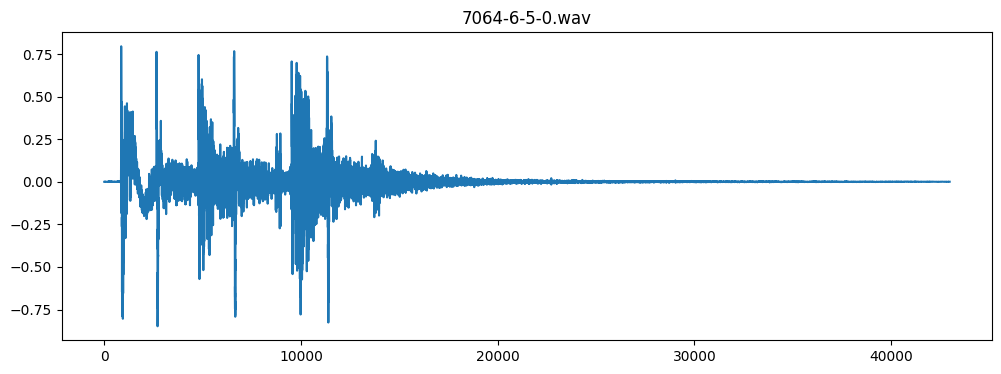

In [21]:
#Matplotlib ile bir figür oluşturup bu figürün size ayarladık ve matplotlib ile grafiğe döktük
plt.figure(figsize = (12,4))
plt.plot(librosa_ses_dosyasi)
plt.title("7064-6-5-0.wav")  #Başlık verir grafiğe
plt.show()

Aşağıdaki işlemde stereoya dönüştürüyor. Stereo -> İki boyutlu Liste , Mono -> Tek boyutlu Liste

Aşağıdaki işlem stereo ses ve grafiği merak ettiğimiz için yapıldı

In [22]:
from scipy.io import wavfile as wav
wave_sample_data , wave_auido = wav.read(ses_dosyasi) 

In [23]:
wave_auido

array([[-15,  -9],
       [ -1,   1],
       [  1,   4],
       ...,
       [  1,  17],
       [  8,  16],
       [  6,  16]], dtype=int16)

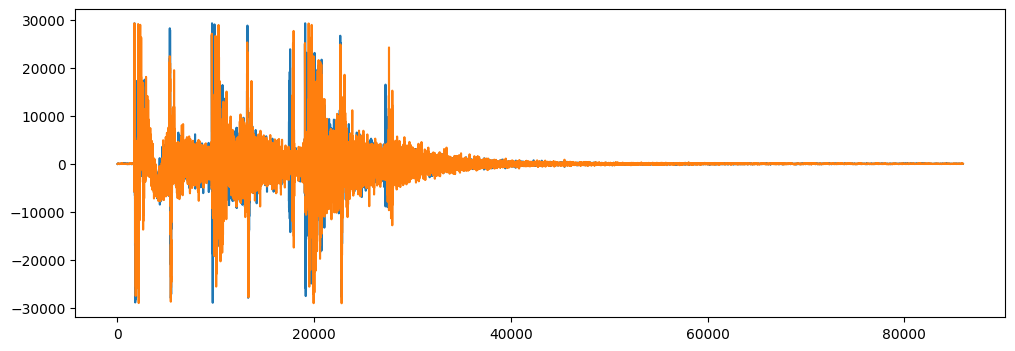

In [24]:
plt.figure(figsize=(12,4))
plt.plot(wave_auido)
plt.show()

## Dataset Üzerinde Çalışma

Librosa, ses dosyasının DFT yaparak Frekans domainini alıyor ve frekanslarını çıkarıyor

In [25]:
mfcc_islemi = lb.feature.mfcc(y=librosa_ses_dosyasi,sr=librosa_oran,n_mfcc=42)
#n_mfcc - > number of Mel-Frequency Cepstral(number of nfcc) işlemi demektir.
#Default değeri 20 dir.Kaç tane öznitelik çıkaracaksak ona göre yazmalıyız.
#Ne kadar çok yapar isek işlem artıyor.Çünkü kütüphane matematiksel işlemler yapıyor içeride fourier dönüşümleri gibi.
#Sayıyı arttırıp azaltarak işlemin verimliliği hızı gözlemlenerek en iyi sonuç alacak değer bulunabilir

In [26]:
print(mfcc_islemi.shape)

(42, 84)


In [27]:
mfcc_islemi      #Bu veriler ses sinyalinin deep learningte kullanılacağı iki boyutlu arrayler

array([[-3.4567685e+02, -4.8731937e+01,  1.0546915e+01, ...,
        -5.6251917e+02, -5.6708032e+02, -5.6861981e+02],
       [ 8.1364006e+01,  7.0015121e+01,  6.5440826e+01, ...,
         6.8671295e+01,  6.4002388e+01,  6.2783859e+01],
       [ 1.4666304e+01,  1.3381410e+01,  1.4958221e+01, ...,
         3.1994308e+01,  3.1395451e+01,  3.1426657e+01],
       ...,
       [ 1.6724730e+00,  2.4362130e+00,  2.4499474e+00, ...,
         7.9270780e-01,  3.3781558e-01,  9.3157697e-01],
       [-5.8258448e+00, -3.3968062e+00, -1.2425914e+00, ...,
        -8.1824398e-01, -2.0767456e-01,  2.0469303e+00],
       [ 1.5774112e+00,  5.7646599e+00,  3.5858130e+00, ...,
        -1.9495666e+00, -8.9641285e-01,  1.6453971e+00]], dtype=float32)

## İşlemleri klasörlerdeki bütün ses dosyalarına uygulamak

Notebookun olduğu dizinde UrbanSound8K dosyasının bulunması gereklidir.Aksi halde dizin hatası verir

In [28]:
ses_klasoru = "UrbanSound8K/audio"                                         #Seslerin(wav dosyaların) bulunduğu dizin
ses_dokumani = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")       #csv verilerin dökümanının oluğu dizini okutuyoruz

In [29]:
ses_dokumani                                                               #Tablonun hepsi

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [30]:
ses_dokumani.tail()                                                        #Tablonun kuyruk yani son kısmı

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [31]:
ses_dokumani.head()                                                        #Tablonun kafa yani ilk kısmı

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


.head() ve .tail() işlemlerinde parantez içine sayı yazarak istediğimiz kadar satır yazdırabiliriz

In [32]:
#Yukarıdaki işlemleri klasör bazında yapabilen bir fonksiyon:
def klasorden_ses_analizi(klasor):
    librosa_ses_dosyasi , librosa_oran = lb.load(klasor,res_type="kaiser_fast")
    mfcc_islemi = lb.feature.mfcc(y=librosa_ses_dosyasi,sr=librosa_oran,n_mfcc=42)
    mfcc_olcek = np.mean(mfcc_islemi.T,axis=0)   #Ortalama alma axis=0 sütunları toplama yap demek.Scale işlemi
    
    return mfcc_olcek

#### Biz burada verilen fonksiyonu kullanmayarak sesleri librosa ile analiz edip mfcc,fourier dönüşümlerini kullanarak mfc spektrogramlara dönüştürmüş olduk

In [36]:
#klasördeki bütün dosyalara ulaşıp seslerin_dizisi adlı diziye aktarıyor
#os ile baştan belirttiğimiz dizin içini tarıyor
seslerin_dizisi = []
for index_num , row in tqdm(ses_dokumani.iterrows()):
    dosya = os.path.join(os.path.abspath(ses_klasoru),"fold"+str(row["fold"])+"/",str(row["slice_file_name"]))
    sinif_etiketleri = row["class"]
    data = klasorden_ses_analizi(dosya)
    seslerin_dizisi.append([data,sinif_etiketleri])

3555it [02:04, 29.55it/s]c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [04:45, 38.04it/s]c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [04:58, 29.27it/s]


In [37]:
seslerin_dizisi

[[array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
          -21.19913   ,  -22.677622  ,  -10.85597   ,   18.294254  ,
            6.652703  ,   14.324025  ,  -12.167682  ,    2.276837  ,
          -17.779188  ,   10.388951  ,   -6.5828357 ,   -0.69445693,
          -18.336023  ,    1.9942534 ,   -5.143332  ,    8.3024    ,
          -12.645056  ,   -6.529732  ,    4.6176677 ,   -2.1799166 ,
           -6.662824  ,    0.35971075,   -3.9084098 ,    4.7756243 ,
           -6.384521  ,   -5.379818  ,    0.9159783 ,    6.9704943 ,
           -0.248668  ,    1.6782187 ,   -5.611182  ,   -2.9643466 ,
            3.1490574 ,   -1.693053  ,   -0.61698383,    0.3860054 ,
            1.4765122 ,    0.9134375 ], dtype=float32),
  'dog_bark'],
 [array([-4.2409818e+02,  1.0934077e+02, -5.2919525e+01,  6.0864750e+01,
          2.4529217e-01,  1.7347328e+01,  2.0955825e+00,  1.0712965e+01,
         -1.3986126e+00,  1.2310798e+01, -1.1208863e+01,  2.1075325e+01,
         -9.4902802e

In [38]:
seslerin_dizisi_tablo = pd.DataFrame(seslerin_dizisi,columns=["Özellik","Sınıf"])
seslerin_dizisi_tablo.head()    #Başından birkaç satırı yazdır
#Fark edilirse aynı sınıftakilerin özellikleri neredeyse aynı

,Özellik,Sınıf
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [39]:
#Veri setlerini bölüp onları liste haline getirelim ki işlemimiz daha rahat olsun
X = np.array(seslerin_dizisi_tablo["Özellik"].tolist())
Y = np.array(seslerin_dizisi_tablo["Sınıf"].tolist())

In [40]:
X                 #Özelliklerin olduğu dizi

array([[-2.1735526e+02,  7.0223381e+01, -1.3038527e+02, ...,
         3.8600540e-01,  1.4765122e+00,  9.1343749e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         4.4632107e-01, -3.0328488e-01, -1.2938468e+00],
       [-4.5879114e+02,  1.2138419e+02, -4.6520660e+01, ...,
        -9.6140963e-01,  1.4399241e+00,  9.6179825e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941566e+01, ...,
         7.6197419e+00,  3.4161453e+00, -1.8517401e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
         5.6668439e+00,  4.0982528e+00,  3.2575753e-01],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
        -6.0105853e+00,  6.4920526e+00,  3.8233562e+00]], dtype=float32)

In [41]:
X.shape             #Özellik için 8732 satır ve verdiğimiz n_mfcc değeri kadar sütun var 

(8732, 42)

In [42]:
Y               #Sınıfların olduğu dizi

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [43]:
Y.shape             #Sınıf için 8732 satır var.Sütun yok çünkü biz özelliklerine göre MFCC işlemi yaptık

(8732,)

In [44]:
lblencoder = LabelEncoder()    #LabelEncoder fonksiyonumuzu çağırıyoruz ve lblencoder ifadesine atıyoruz
#Bu işlemi yapma nedenimiz sınıfları binary (1 ve 0) lardan oluşturması içindir
#sınıflara bu işlemi yapacağımız için Y üzerine işlem yapıyoruz
y = to_categorical(lblencoder.fit_transform(Y))

In [45]:
y                   #LabelEncoder yapıldıktan sonra sınıfların çıktısı

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
y[-1]               #Son sınıf car_horn du burada [-1] yazarak sondaki sınıfın yeni ifadesini yazdırdık

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Verileri Train ve Test olarak ikiye bölelim

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#test_size = değeri biz 0.3 yaptık yüzde 70 train yüzde 30 test olmuş olacak.Bu değeri istediğimiz gibi verebiliriz
#X i büyük y yi küçük kullanma sebebi bize Y nin encode edilmiş hali lazım yani y lazım o sebeple

In [48]:
X_train

array([[-5.0502014e+02,  8.2667404e+01, -2.8512821e+00, ...,
         1.3451980e+00, -6.0584998e-01,  2.5337178e-01],
       [-8.3928871e+01,  2.4849123e+01, -3.2878976e+00, ...,
         1.3855314e+00, -7.7190721e-01,  1.6913699e+00],
       [-1.0070214e+02,  1.9266779e+01, -4.4623638e+01, ...,
         7.2160894e-01, -1.8312956e+00,  3.4209182e+00],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293976e+00, ...,
         7.1100914e-01,  2.4073691e+00, -1.7387552e+00],
       [-1.4575461e+02,  1.3626578e+02, -3.3515522e+01, ...,
        -8.8218188e-01, -1.0782034e+00,  1.0085886e+00],
       [-4.2103134e+02,  2.1065454e+02,  3.4906607e+00, ...,
        -1.5665114e+00, -3.9213605e+00, -4.5193129e+00]], dtype=float32)

In [49]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
X_train.shape            #%70 olarak böldü.ikinci değer n_mfcc değeridir.

(6112, 42)

In [51]:
X_test.shape             #%30 olarak böldü.ikinci değer n_mfcc değeridir.

(2620, 42)

In [52]:
y_train.shape            #%70 olarak böldü.10 sütun var çünkü 10 tane sınıf var.

(6112, 10)

In [53]:
y_test.shape             #%30 olarak böldü.10 sütun var çünkü 10 tane sınıf var.

(2620, 10)

## Dataları CSV dosyasına aktarma

#### Aktarmalıyız ki modelin dosyasında bu dataları kullanabilelim

In [98]:
np.savetxt("y_test.csv",y_test, delimiter=",")
np.savetxt("X_train.csv",X_train, delimiter=",")
np.savetxt("X_test.csv",X_test, delimiter=",")
np.savetxt("y_train.csv",y_train, delimiter=",")